In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("Layoffs_cleaned.csv")
df.head()

,Company,Location HQ,Number_of_Layoff,Layoff_Date,Layoff_Percentage,Industry,Stage,Raised_Amount($mm),Country,Layoff_Month,Layoff_Year,Layoff_Quarter,Layoff_Severity,Funding_Category
0,Cars24,Gurugram,120,2025-05-27,17.0,Transportation,Series G,1300.0,India,5,2025,2,Medium,high_funded
1,nCino,Wilmington,70,2025-05-27,7.0,Finance,Post-IPO,1100.0,United States,5,2025,2,Medium,high_funded
2,Otipy,New Delhi,300,2025-05-23,100.0,Food,Series B,44.0,India,5,2025,2,Medium,low_funded
3,LeddarTech,Quebec,138,2025-05-22,95.0,Transportation,Post-IPO,402.0,Canada,5,2025,2,Medium,high_funded
4,Climeworks,Zurich,106,2025-05-21,22.0,Energy,Private Equity,734.0,Switzerland,5,2025,2,Medium,high_funded


In [3]:
df.shape # Check for the dataframe size

(4074, 14)

In [4]:
df.info() # check for the column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             4074 non-null   object 
 1   Location HQ         4071 non-null   object 
 2   Number_of_Layoff    4074 non-null   int64  
 3   Layoff_Date         4074 non-null   object 
 4   Layoff_Percentage   4074 non-null   float64
 5   Industry            4074 non-null   object 
 6   Stage               4074 non-null   object 
 7   Raised_Amount($mm)  4074 non-null   float64
 8   Country             4074 non-null   object 
 9   Layoff_Month        4074 non-null   int64  
 10  Layoff_Year         4074 non-null   int64  
 11  Layoff_Quarter      4074 non-null   int64  
 12  Layoff_Severity     4074 non-null   object 
 13  Funding_Category    4074 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 445.7+ KB


In [5]:
# describe the related statistics for the every columns
df.describe(include='all')

,Company,Location HQ,Number_of_Layoff,Layoff_Date,Layoff_Percentage,Industry,Stage,Raised_Amount($mm),Country,Layoff_Month,Layoff_Year,Layoff_Quarter,Layoff_Severity,Funding_Category
count,4074,4071,4074.000000,4074,4074.000000,4074,4074,4074.000000,4074,4074.000000,4074.000000,4074.000000,4074,4074
unique,2798,250,NaN,1044,NaN,31,16,NaN,66,NaN,NaN,NaN,3,3
top,Amazon,SF Bay Area,NaN,2020-04-02,NaN,Finance,Post-IPO,NaN,United States,NaN,NaN,NaN,Medium,high_funded
freq,14,1021,NaN,27,NaN,491,911,NaN,2646,NaN,NaN,NaN,2870,1589
mean,NaN,NaN,213.679921,NaN,24.854443,NaN,NaN,756.154762,NaN,5.985272,2022.437653,2.353952,NaN,NaN
std,NaN,NaN,782.533010,NaN,24.829565,NaN,NaN,4345.375445,NaN,3.377949,1.316449,1.085313,NaN,NaN
min,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,1.000000,2020.000000,1.000000,NaN,NaN
25%,NaN,NaN,52.000000,NaN,12.000000,NaN,NaN,61.000000,NaN,3.000000,2022.000000,1.000000,NaN,NaN
50%,NaN,NaN,85.000000,NaN,17.500000,NaN,NaN,181.500000,NaN,6.000000,2023.000000,2.000000,NaN,NaN
75%,NaN,NaN,130.000000,NaN,23.000000,NaN,NaN,429.750000,NaN,9.000000,2023.000000,3.000000,NaN,NaN


Distribution Analysis

Text(0.5, 1.0, 'Distribution of Number of Layoffs')

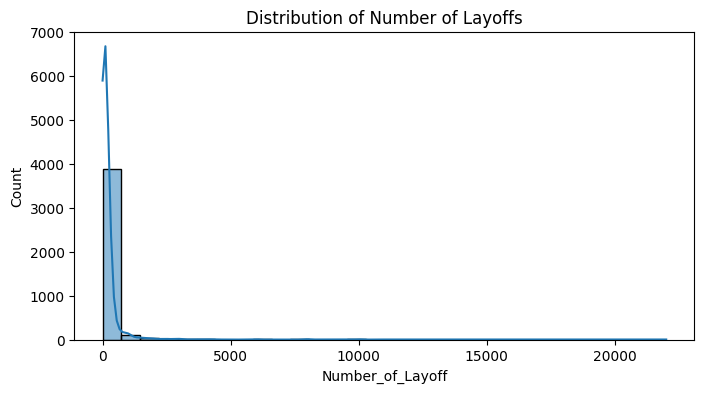

In [6]:
# Number of Layoff
plt.figure(figsize=(8,4))
sns.histplot(df['Number_of_Layoff'], bins=30, kde=True)
plt.title('Distribution of Number of Layoffs')
# Count" means how many times a company laid off around X number of employees.

This visualization shows that :
1. Most companies have laid off fewer than 5000 employees.
2. A very small number of companies had massive layoffs (up to 20,000).

3. The distribution is right-skewed, meaning most layoffs are small, but a few extreme events (big tech layoffs) stretch the tail.

It helps us to categorize companies into small/medium/large layoffs and useful to create categories like "Layoff Severity".



Text(0.5, 1.0, 'Distribution of Layoff Percentage')

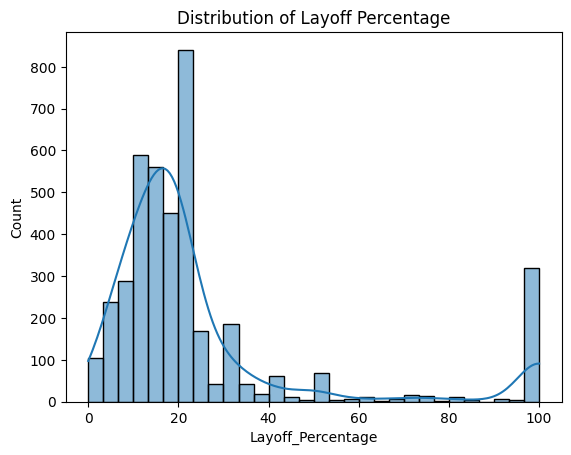

In [8]:
# Layoff percentage
sns.histplot(df['Layoff_Percentage'], bins=30, kde=True)
plt.title('Distribution of Layoff Percentage')

This chart shows that:
1. Most layoffs were in the 10–30% range.
2. There's a small bump near 100%, meaning some companies completely shut down.
3. This Shows the severity of layoffs relative to company size.

Text(0.5, 1.0, 'Distribution of Funding Amount (Log Scale)')

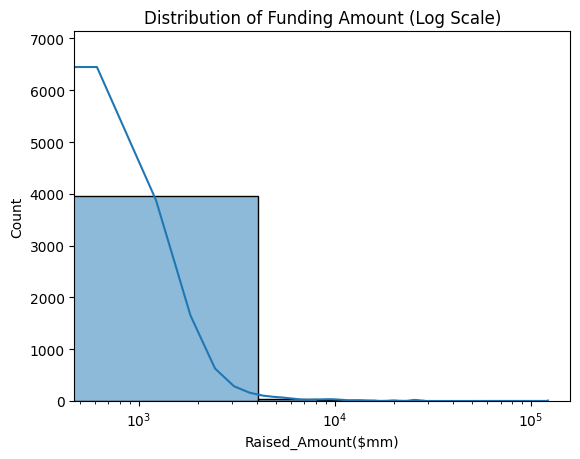

In [9]:
# Raised Amount
# Log-scale histogram for better view
import numpy as np
# Apply log transformation first

sns.histplot(df['Raised_Amount($mm)'], bins=30, kde=True)
plt.xscale('log')
plt.title('Distribution of Funding Amount (Log Scale)')

This shows that:
1. Most companies raised less than $1000 million (or $1B).
2. Very few raised huge amounts — hence the use of log scale, which compresses wide ranges.
3. Based on observation, we can categorize companies as low-funded, medium-funded, high-funded.


Based on early observations of the *Number_of_Layoffs* and *Funding Amount*, I hypothesized that severity and funding categories might reveal key trends. I created engineered features (Layoff_Severity, Funding_Category) and validated their impact through the above graphs.

Univariate Visualizations (1 variable)

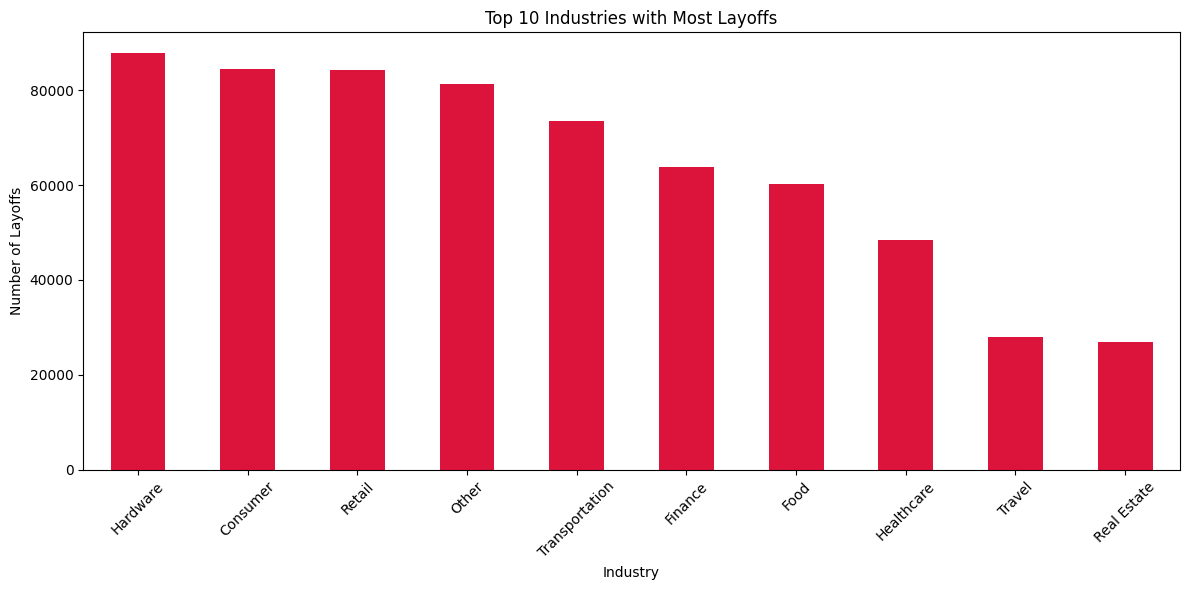

<Figure size 640x480 with 0 Axes>

In [10]:
# Top industries by layoff
df.groupby('Industry')['Number_of_Layoff'].sum().sort_values(ascending= False).head(10).plot(kind='bar', figsize=(12,6), color='Crimson')
plt.title("Top 10 Industries with Most Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_Industries_layoffs.png")
plt.show()
plt.clf()

This visualization clearly shows that the Hardware, Consumer, and Retail are highest layoff industries. Other industries like Transportation, Finance also has see a huge layoff.

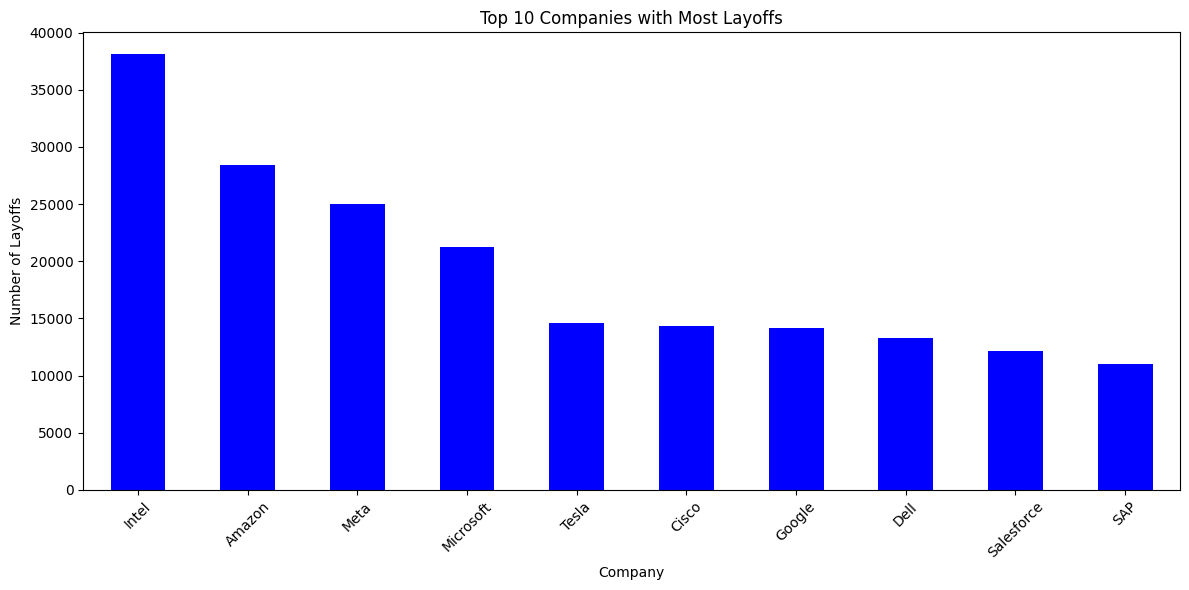

<Figure size 640x480 with 0 Axes>

In [11]:
# Top compnies by layoff
df.groupby('Company')['Number_of_Layoff'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6), color='blue')
plt.title("Top 10 Companies with Most Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_companies_layoffs.png")
plt.show()
plt.clf()

This chart clearly shows that the Intel has the highest layoff followed by the Amazon Meta, Microsoft and Tesla.

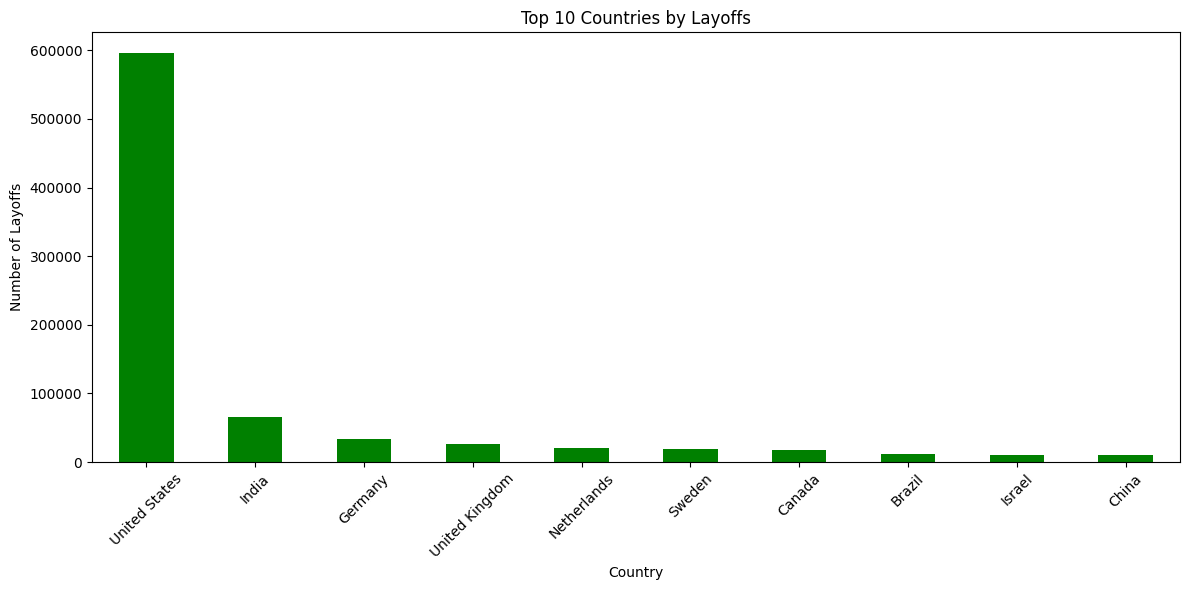

<Figure size 640x480 with 0 Axes>

In [12]:
# Top 10 Countries by Layoff
df.groupby('Country')['Number_of_Layoff'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green', figsize=(12,6))
plt.title("Top 10 Countries by Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("layoffs_by_country.png")
plt.show()
plt.clf()

This chart clearly shows that the USA has the highest number of layoff among all. After USA, India, Germany and the UK has the highest layoff.

Time Series Visualizations

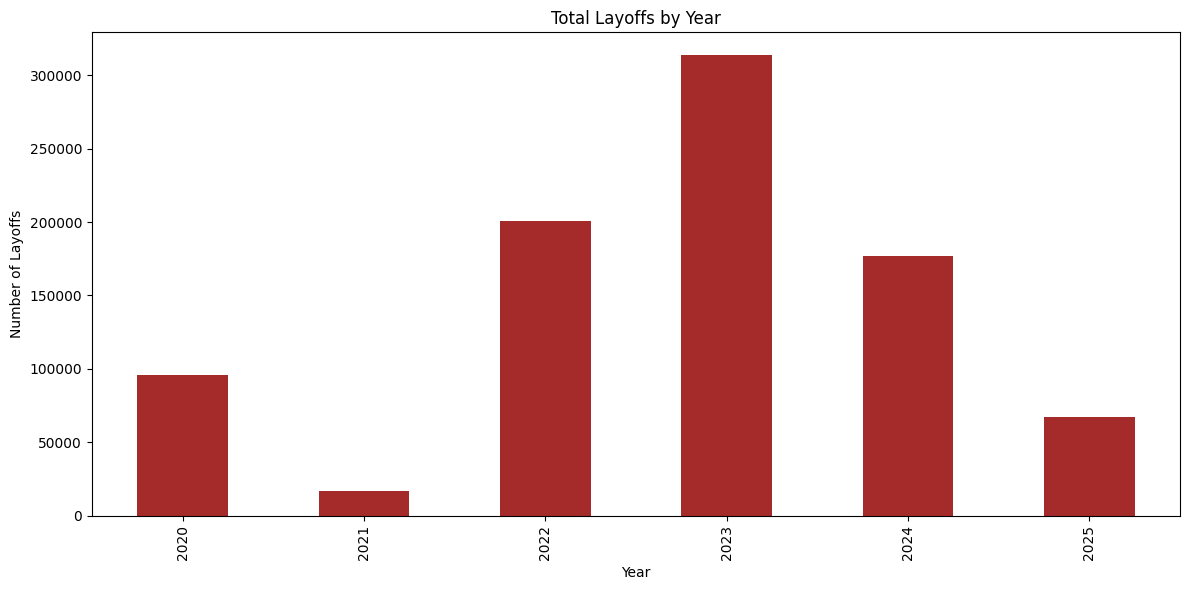

<Figure size 640x480 with 0 Axes>

In [13]:
# Layoff by Year
df.groupby('Layoff_Year')['Number_of_Layoff'].sum().plot(kind='bar', color='brown', figsize=(12,6) )
plt.title("Total Layoffs by Year")
plt.xlabel("Year")
plt.ylabel("Number of Layoffs")
plt.tight_layout()
plt.savefig("layoffs_by_year.png")
plt.show()
plt.clf()

This graph shows that the Maximum layoff happens in the year 2023 followed by 2022 and 2024. Since year 2021 has least layoff till now.

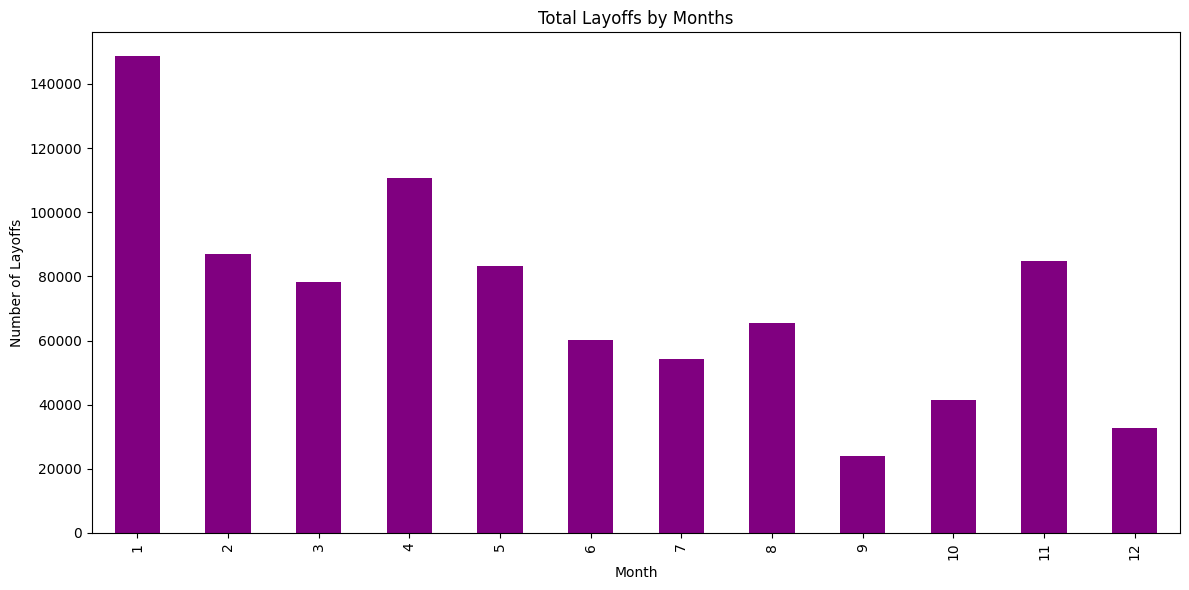

<Figure size 640x480 with 0 Axes>

In [25]:
# Layoff by Months
df.groupby('Layoff_Month')['Number_of_Layoff'].sum().plot(kind='bar', color='purple', figsize=(12,6) )
plt.title("Total Layoffs by Months")
plt.xlabel("Month")
plt.ylabel("Number of Layoffs")
plt.tight_layout()
plt.savefig("layoffs_by_months.png")
plt.show()
plt.clf()

The chart shows that the January Month has highest layoff followed by April, November and Febuary.

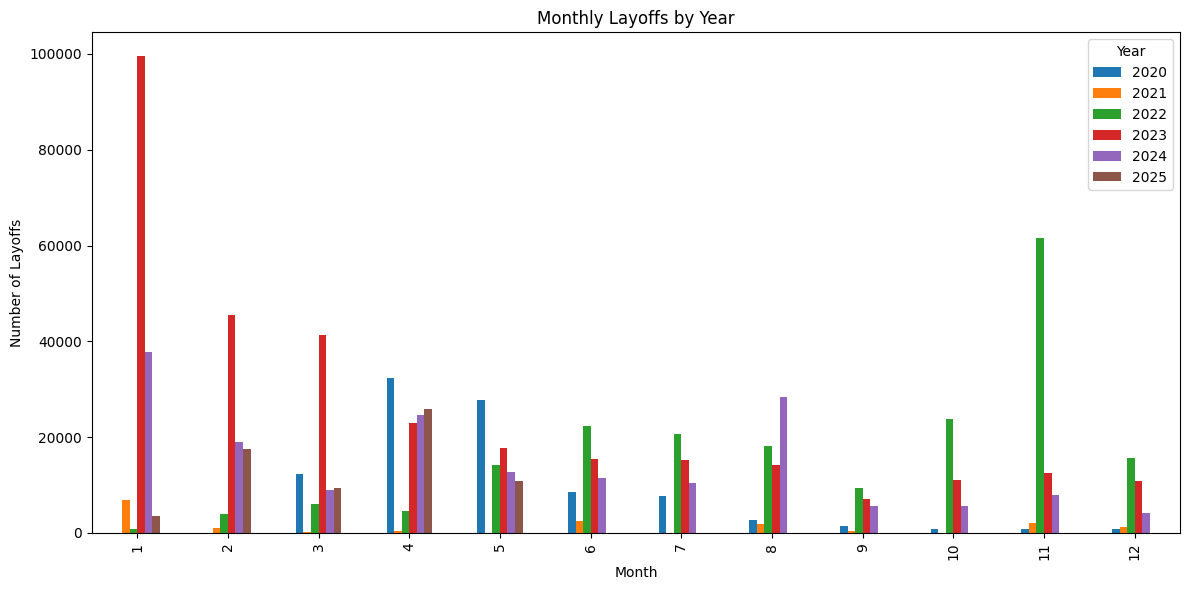

<Figure size 640x480 with 0 Axes>

In [15]:
# Layoff by months over years
month_order = list(range(1, 13))
df.groupby(['Layoff_Year', 'Layoff_Month'])['Number_of_Layoff'].sum().unstack().T.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Layoffs by Year")
plt.xlabel("Month")
plt.ylabel("Number of Layoffs")
plt.legend(title="Year")
plt.tight_layout()
plt.savefig("Monthly_Layoffs_by_year.png")
plt.show()
plt.clf()

This graph clearly shows the layoff in every
month in a year. Here it is clear that in the year 2023, January month has highest number of layoff followed by layoff in November 2022.

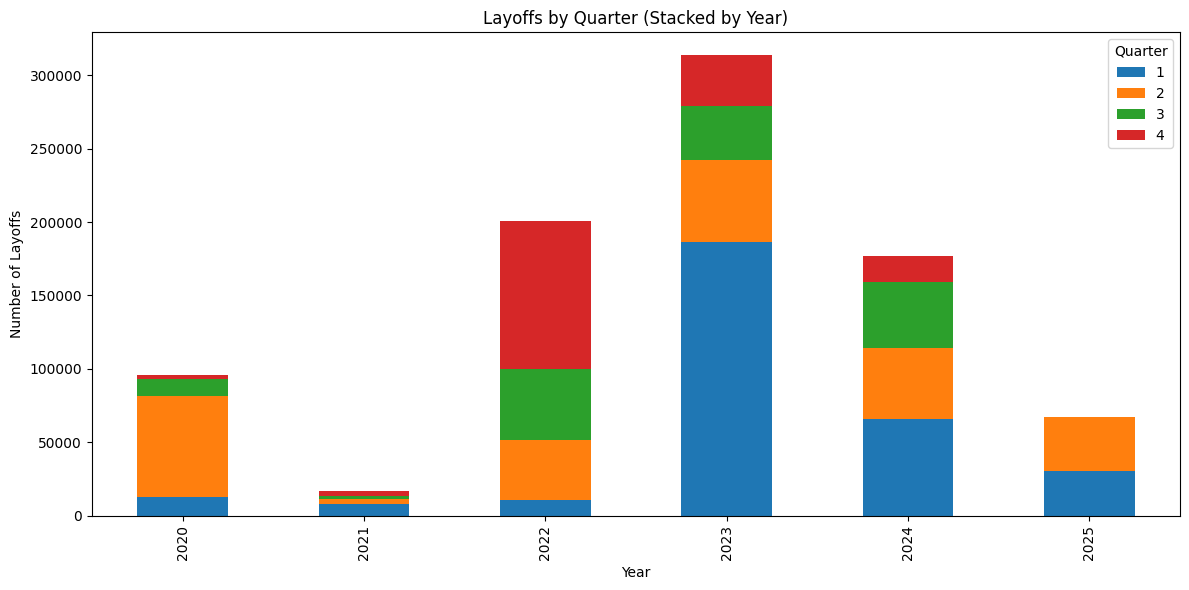

<Figure size 640x480 with 0 Axes>

In [16]:
# Layoff by Quarter
df.groupby(['Layoff_Year', 'Layoff_Quarter'])['Number_of_Layoff'].sum().unstack().plot(kind='bar', figsize=(12,6),stacked=True)
plt.title("Layoffs by Quarter (Stacked by Year)")
plt.xlabel("Year")
plt.ylabel("Number of Layoffs")
plt.legend(title='Quarter')
plt.tight_layout()
plt.savefig("layoffs_by_quarter.png")
plt.show()
plt.clf()

This chart shows that layoffs don’t happen evenly throughout the year — they mostly happen in specific quarters, especially early in the year.
The highest layoff was in 2023 Q1, suggesting a major industry-wide downsizing during that time.The lowest layoff was in year 2021, Q3.



**Bivariate Visualizations (2 variables)**

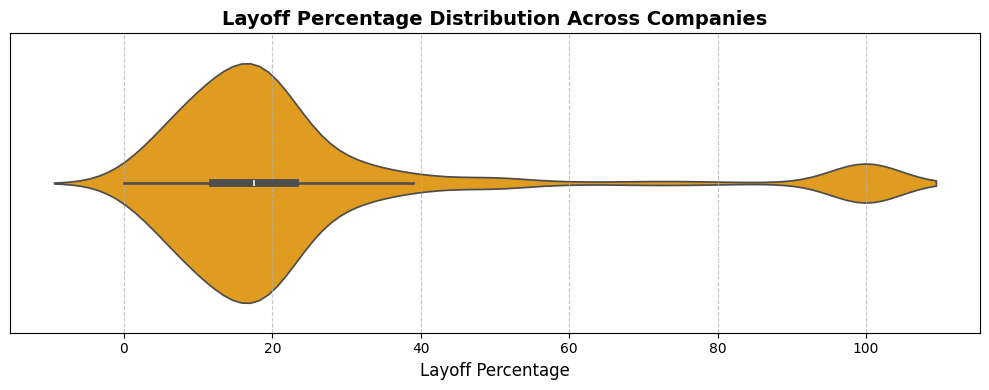

<Figure size 640x480 with 0 Axes>

In [17]:
# Layoff percentage distribution across compnies
plt.figure(figsize=(10, 4))
sns.violinplot(x=df['Layoff_Percentage'].dropna(), color='orange')
plt.title("Layoff Percentage Distribution Across Companies", fontsize=14, fontweight='bold')
plt.xlabel("Layoff Percentage", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("layoff_percentage_distribution_across_compnies.png")
plt.show()
plt.clf()

This violin plot visualizes the distribution of layoff percentages across companies in the dataset.  
*   Wider parts = more companies with layoffs around that percentage.
*   Narrower parts = fewer companies with layoffs around that percentage.

1. **Thickest Area ~15–25%**: This means a large number of companies laid off between 15% and 25% of their workforce.
That’s where the distribution peaks the most common layoff range.

2. **Narrow areas ~60–80%**: Few companies laid off that much.It’s uncommon in the dataset.

3. **Small bump at 100%**: A small but noticeable number of companies laid off 100% (probably shut down).
That part is narrow but not invisible — so it’s not very frequent, but still significant.

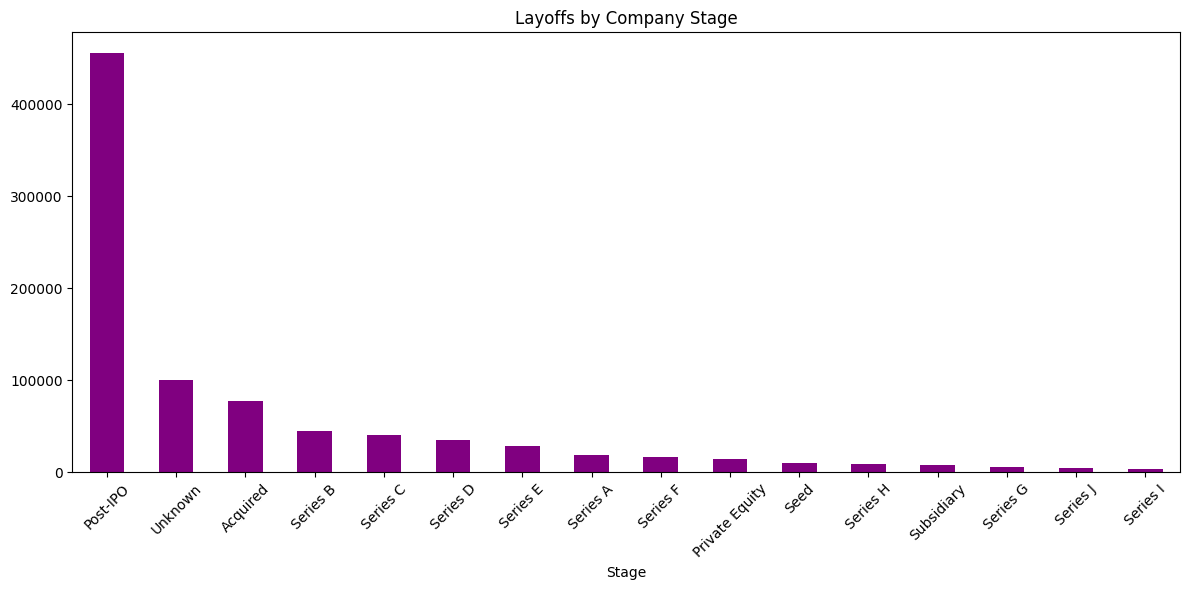

<Figure size 640x480 with 0 Axes>

In [18]:
# Layoff by Funding stage
df.groupby('Stage')['Number_of_Layoff'].sum().sort_values(ascending=False).plot(kind='bar', color='purple', figsize=(12,6))
plt.title("Layoffs by Company Stage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("layoffs_by_funding_stage.png")
plt.show()
plt.clf()

This chart clearly shows that the compnies after the IPO are most to layoff. After that the Acquired and some unknown stage compnies more to layoff.

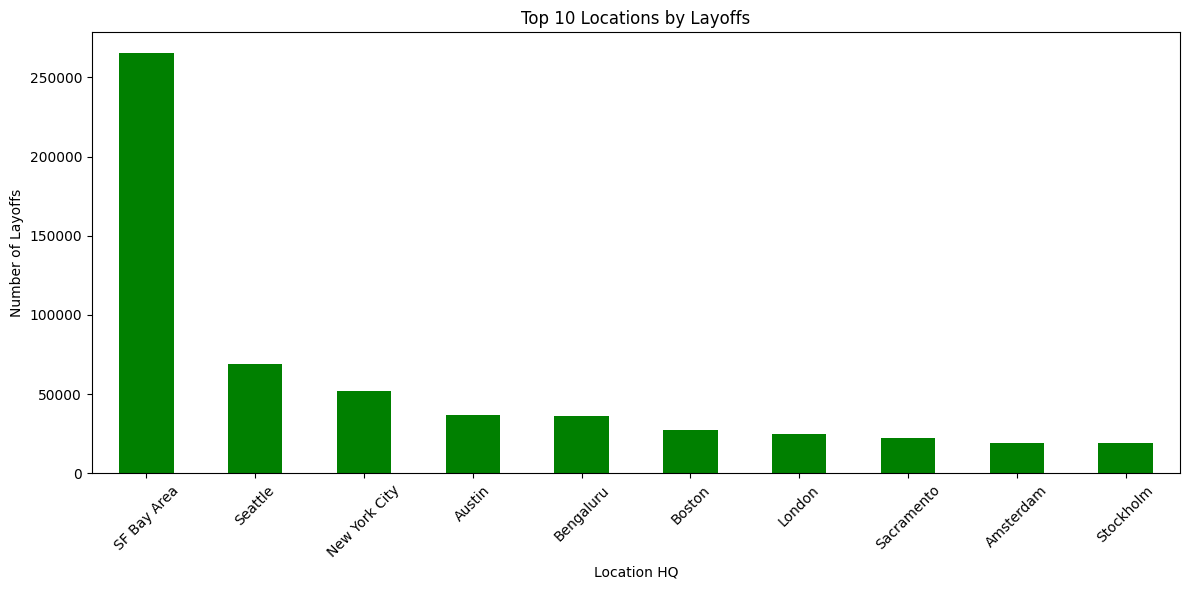

<Figure size 640x480 with 0 Axes>

In [19]:
# Layoff by Locations
df.groupby('Location HQ')['Number_of_Layoff'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green', figsize=(12,6))
plt.title("Top 10 Locations by Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("layoffs_by_Locations.png")
plt.show()
plt.clf()

This chart clearly shows that the SF Bay Area is the most affected location by layoff followed by Seattle and New York City.

<ipython-input-20-9277cde604a5>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Funding_Bin')['Number_of_Layoff'].sum().reset_index()


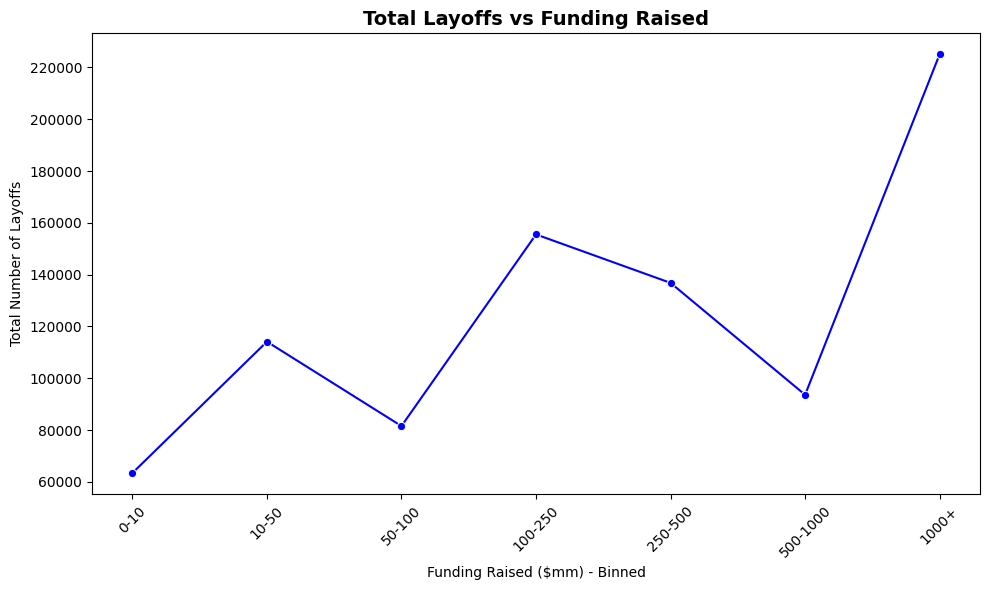

<Figure size 640x480 with 0 Axes>

In [20]:
# Layoffs by the Raised Amounts
df['Funding_Bin'] = pd.cut(df['Raised_Amount($mm)'],
                           bins=[0, 10, 50, 100, 250, 500, 1000, df['Raised_Amount($mm)'].max()],
                           labels=["0-10", "10-50", "50-100", "100-250", "250-500", "500-1000", "1000+"])

# Group by funding bins and sum layoffs
grouped = df.groupby('Funding_Bin')['Number_of_Layoff'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Funding_Bin', y='Number_of_Layoff', marker='o', color='blue')
plt.title("Total Layoffs vs Funding Raised", fontsize=14, fontweight='bold')
plt.xlabel("Funding Raised ($mm) - Binned")
plt.ylabel("Total Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Total_Layoffs_by_Funding_Raised.png")
plt.show()
plt.clf()

In [21]:
del df['Funding_Bin']

This chart shows that the highest raised compnies has most number of layoff but they are not following a linear trends.

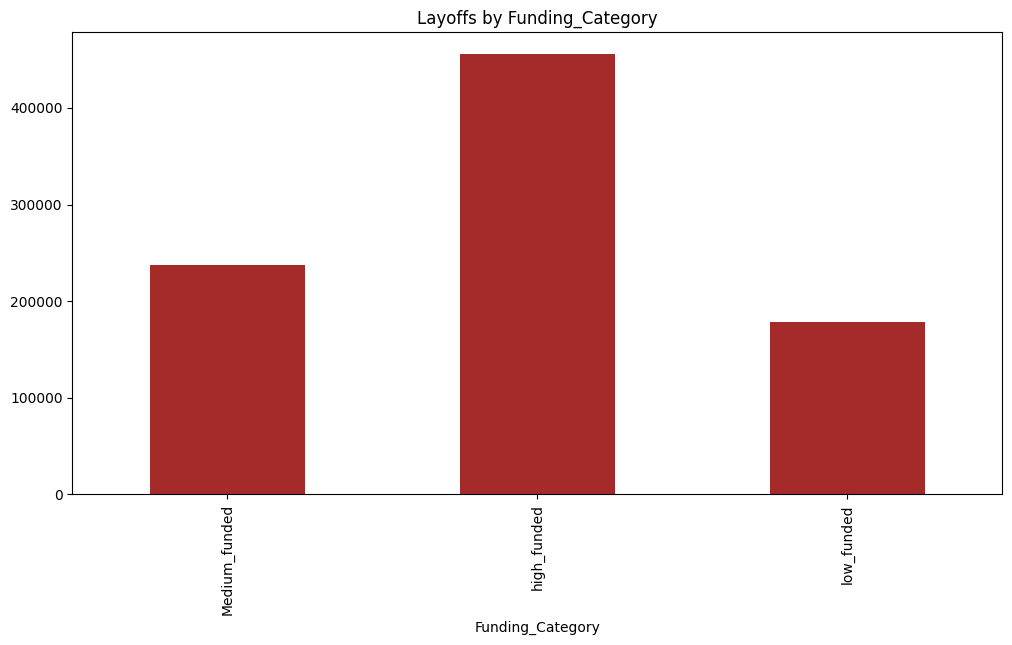

<Figure size 640x480 with 0 Axes>

In [22]:
# Layoff Severity by the total Layoff
df.groupby('Funding_Category')['Number_of_Layoff'].sum().plot(kind='bar', color='brown', figsize=(12,6))
plt.title("Layoffs by Funding_Category")
plt.savefig("Layoff_by_Funding_Category.png")
plt.show()
plt.clf()

This visualization shows that the high funded compnies has most layoffs.

In [23]:
df.head()

,Company,Location HQ,Number_of_Layoff,Layoff_Date,Layoff_Percentage,Industry,Stage,Raised_Amount($mm),Country,Layoff_Month,Layoff_Year,Layoff_Quarter,Layoff_Severity,Funding_Category
0,Cars24,Gurugram,120,2025-05-27,17.0,Transportation,Series G,1300.0,India,5,2025,2,Medium,high_funded
1,nCino,Wilmington,70,2025-05-27,7.0,Finance,Post-IPO,1100.0,United States,5,2025,2,Medium,high_funded
2,Otipy,New Delhi,300,2025-05-23,100.0,Food,Series B,44.0,India,5,2025,2,Medium,low_funded
3,LeddarTech,Quebec,138,2025-05-22,95.0,Transportation,Post-IPO,402.0,Canada,5,2025,2,Medium,high_funded
4,Climeworks,Zurich,106,2025-05-21,22.0,Energy,Private Equity,734.0,Switzerland,5,2025,2,Medium,high_funded


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             4074 non-null   object 
 1   Location HQ         4071 non-null   object 
 2   Number_of_Layoff    4074 non-null   int64  
 3   Layoff_Date         4074 non-null   object 
 4   Layoff_Percentage   4074 non-null   float64
 5   Industry            4074 non-null   object 
 6   Stage               4074 non-null   object 
 7   Raised_Amount($mm)  4074 non-null   float64
 8   Country             4074 non-null   object 
 9   Layoff_Month        4074 non-null   int64  
 10  Layoff_Year         4074 non-null   int64  
 11  Layoff_Quarter      4074 non-null   int64  
 12  Layoff_Severity     4074 non-null   object 
 13  Funding_Category    4074 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 445.7+ KB
